In [97]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import json
import ast
import eli5

In [98]:
TRAIN_PATH = "/Users/zakopuro/Code/python_code/kaggle_TMDB/input/train.csv"
TEST_PATH = "/Users/zakopuro/Code/python_code/kaggle_TMDB/input/test.csv"

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

In [99]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def str_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: None if pd.isna(x) else ast.literal_eval(x) )
    return df

df_train = str_to_dict(df_train)
df_test = str_to_dict(df_test)

In [100]:
df_test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,None,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,None,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,None,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,None,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [101]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,None,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,None,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,None,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,None,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [102]:
df_train.shape,df_test.shape

((3000, 23), (4398, 22))

In [103]:
df_train['has_homepage'] = 0
df_test['has_homepage'] = 0

In [104]:
# ホームページが存在するかしないかでcolumnを作成
df_train.loc[df_train['homepage'].isnull() == False, 'has_homepage'] = 1
df_test.loc[df_test['homepage'].isnull() == False, 'has_homepage'] = 1
df_train = df_train.drop(['homepage'],axis=1)
df_test = df_test.drop(['homepage'],axis=1)

In [105]:
df_train['genres'].apply(lambda x: len(x) if x != None else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [106]:
df_train['genres_num'] =  df_train['genres'].apply(lambda x: len(x) if x != None else 0)
df_test['genres_num'] =  df_test['genres'].apply(lambda x: len(x) if x != None else 0)

In [107]:
df_train['genres'].apply(lambda x: [i['id'] for i in x] if x != None else 0)

0                             [35]
1           [35, 18, 10751, 10749]
2                             [18]
3                         [53, 18]
4                         [28, 53]
5                  [16, 12, 10751]
6                         [27, 53]
7                             [99]
8       [28, 35, 10402, 10751, 12]
9                      [35, 10402]
10                            [18]
11                            [35]
12                            [18]
13                        [35, 80]
14             [28, 53, 878, 9648]
15                    [28, 80, 18]
16                        [27, 53]
17                     [18, 10749]
18                     [35, 10749]
19                    [28, 53, 80]
20                [12, 10751, 878]
21                        [27, 53]
22                        [53, 27]
23               [53, 9648, 10769]
24                        [27, 35]
25              [35, 27, 9648, 53]
26              [80, 18, 9648, 53]
27                 [18, 35, 10749]
28                  

[1110843.7142857143]
[1110843.7142857143, 39668452.05564924]
[1110843.7142857143, 39668452.05564924, 44756592.62654321]
[1110843.7142857143, 39668452.05564924, 44756592.62654321, 88884974.68222222]
[1110843.7142857143, 39668452.05564924, 44756592.62654321, 88884974.68222222, 106610528.41475827]
[1110843.7142857143, 39668452.05564924, 44756592.62654321, 88884974.68222222, 106610528.41475827, 82589278.18018018]
[1110843.7142857143, 39668452.05564924, 44756592.62654321, 88884974.68222222, 106610528.41475827, 82589278.18018018, 92336591.47619048]
[1110843.7142857143, 39668452.05564924, 44756592.62654321, 88884974.68222222, 106610528.41475827, 82589278.18018018, 92336591.47619048, 47362159.333333336]


Text(0, 0.5, 'revenue_median')

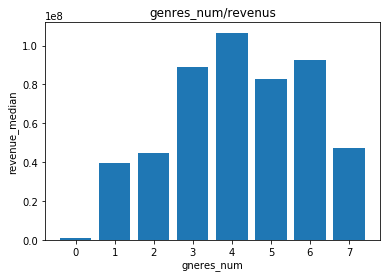

In [108]:
list_genres_num = []
list_revunes_genresu_num = []
for i,_ in enumerate(df_train['genres_num'].value_counts()):
    list_genres_num.append(i)
    list_revunes_genresu_num.append(df_train[df_train['genres_num'] == i]['revenue'].mean()) 
    print(list_revunes_genresu_num)
    
plt.bar(list_genres_num,list_revunes_genresu_num)
plt.title('genres_num/revenus')
plt.xlabel('gneres_num')
plt.ylabel('revenue_median')

In [109]:
df_train['collection_name'] = df_train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != None else 0)
df_train['has_collection'] = df_train['belongs_to_collection'].apply(lambda x: len(x) if x != None else 0)

df_test['collection_name'] = df_test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != None else 0)
df_test['has_collection'] = df_test['belongs_to_collection'].apply(lambda x: len(x) if x != None else 0)

df_train = df_train.drop(['belongs_to_collection'], axis=1)
df_test = df_test.drop(['belongs_to_collection'], axis=1)

In [113]:
df_train['production_companies'].apply(lambda x: len(x) if x != None else 0).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [112]:
df_train['companies_num'] =  df_train['production_companies'].apply(lambda x: len(x) if x != None else 0)


1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [16]:
df_train['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
te       2
pl       2
no       2
fi       2
ml       2
ur       1
bn       1
cs       1
ar       1
mr       1
id       1
he       1
el       1
nb       1
vi       1
sr       1
Name: original_language, dtype: int64

In [17]:
le = LabelEncoder()
le.fit(list(df_train['original_language']))
df_train['original_language'] = le.transform(df_train['original_language'])

In [18]:
le = LabelEncoder()
le.fit(list(df_test['original_language']))
df_test['original_language'] = le.transform(df_test['original_language'])

In [19]:
df_train = df_train.drop(['imdb_id', 'homepage','genres','status','poster_path','overview','title','original_title'],axis=1)
df_test = df_test.drop(['imdb_id', 'homepage','genres','status','poster_path','overview','title','original_title'],axis=1)

In [ ]:
df_train.head()

In [21]:
df_train['has_collection'] = 0
df_test['has_collection'] = 0

In [22]:
df_train['has_collection'] = df_train['belongs_to_collection'].apply(lambda x: len(x) if x != None else 0)
df_test['has_collection'] = df_test['belongs_to_collection'].apply(lambda x: len(x) if x != None else 0)

In [23]:
df_train = df_train.drop(['belongs_to_collection'],axis=1)
df_test = df_test.drop(['belongs_to_collection'],axis=1)

In [24]:
df_train['companies_num'] = 0
df_test['companies_num'] = 0

In [25]:
df_train['companies_num'] = df_train['production_companies'].apply(lambda x: len(x) if x != None else 0)
df_test['companies_num'] = df_test['production_companies'].apply(lambda x: len(x) if x != None else 0)

In [26]:
df_train = df_train.drop(['production_companies'],axis=1)
df_test = df_test.drop(['production_companies'],axis=1)

In [27]:
df_train['country_num'] = 0
df_test['country_num'] = 0

In [28]:
df_train['country_num'] = df_train['production_countries'].apply(lambda x: len(x) if x != None else 0)
df_test['country_num'] = df_test['production_countries'].apply(lambda x: len(x) if x != None else 0)

In [29]:
df_train = df_train.drop(['production_countries'],axis=1)
df_test = df_test.drop(['production_countries'],axis=1)

In [30]:
df_train.head()

,id,budget,original_language,popularity,release_date,runtime,spoken_languages,tagline,Keywords,cast,crew,revenue,has_homepage,genres_num,has_collection,companies_num,country_num
0,1,14000000,7,6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,1,3,1
1,2,40000000,7,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,4,1,1,1
2,3,3300000,7,64.299990,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The road to greatness can take you to the edge.,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,1,0,3,1
3,4,1200000,13,3.174936,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,1,2,0,0,1
4,5,0,18,1.148070,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",NaN,None,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,2,0,0,1


In [31]:
df_train['spoken_languages_num'] = 0
df_test['spoken_languages_num'] = 0

In [32]:
df_train['spoken_languages_num'] = df_train['spoken_languages'].apply(lambda x: len(x) if x != None else 0)
df_test['spoken_languages_num'] = df_test['spoken_languages'].apply(lambda x: len(x) if x != None else 0)

In [33]:
df_train = df_train.drop(['spoken_languages'],axis=1)
df_test = df_test.drop(['spoken_languages'],axis=1)

In [34]:
df_train = df_train.drop(['tagline'],axis=1)
df_test = df_test.drop(['tagline'],axis=1)

In [35]:
df_train['Keyword_num'] = 0
df_test['Keyword_num'] = 0

In [36]:
df_train['Keyword_num'] = df_train['Keywords'].apply(lambda x: len(x) if x != None else 0)
df_test['Keyword_num'] = df_test['Keywords'].apply(lambda x: len(x) if x != None else 0)

In [37]:
df_train = df_train.drop(['Keywords'],axis=1)
df_test = df_test.drop(['Keywords'],axis=1)

In [38]:
df_train['cast_num'] = 0
df_test['cast_num'] = 0

In [39]:
df_train['cast_num'] = df_train['cast'].apply(lambda x: len(x) if x != None else 0)
df_test['cast_num'] = df_test['cast'].apply(lambda x: len(x) if x != None else 0)

In [40]:
df_train = df_train.drop(['cast'],axis=1)
df_test = df_test.drop(['cast'],axis=1)

In [41]:
df_train['crew_num'] = 0
df_test['crew_num'] = 0

In [42]:
df_train['crew_num'] = df_train['crew'].apply(lambda x: len(x) if x != None else 0)
df_test['crew_num'] = df_test['crew'].apply(lambda x: len(x) if x != None else 0)

In [43]:
df_train = df_train.drop(['crew'],axis=1)
df_test = df_test.drop(['crew'],axis=1)

In [44]:
def chg_date_year(date):
    if date == 'NaN':
        year = 'NaN'
        print('debug')
    else:
        if date.year >= 2020:
            # 2020年以降はおかしいので−１００年する
            year = date.year - 100
        else:
            year = date.year
    return year

In [45]:
df_train['release_date'] = pd.to_datetime(df_train['release_date'])
df_test['release_date'] = pd.to_datetime(df_test['release_date'])
df_train['release_date_year'] = df_train['release_date'].apply(lambda x: chg_date_year(x))
df_test['release_date_year'] = df_test['release_date'].apply(lambda x: chg_date_year(x))

In [46]:
df_train = df_train.drop(['release_date'],axis=1)
df_test = df_test.drop(['release_date'],axis=1)

In [47]:
df_train = df_train.drop(['id'],axis=1)
df_test = df_test.drop(['id'],axis=1)

In [48]:
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())

In [49]:
X = df_train.drop(['revenue'],axis =1)
y = df_train['revenue']

In [50]:
X_test = df_test

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3,random_state=12)

In [52]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [53]:
# model_svr = SVR()
# model_svr.fit(X_train,y_train)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_valid_norm = scaler.transform(X_valid)

/anaconda3/envs/mlpy36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/mlpy36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [54]:
#リッジ回帰
Ridge_params = {"alpha":np.logspace(-2,4,24)}
gridsearch = GridSearchCV(Ridge(),Ridge_params,scoring= 'neg_mean_squared_error',return_train_score=True)
gridsearch.fit(X_train_norm,y_train)
print('最適パラメータ',gridsearch.best_params_,'neg_mean_squared_error',gridsearch.best_score_)
ridge = Ridge(alpha = gridsearch.best_params_['alpha']).fit(X_train_norm,y_train)
Ridge_score = rmsle(ridge.predict(X_valid_norm),y_valid)
print(Ridge_score)

最適パラメータ {'alpha': 4.061585988376979} neg_mean_squared_error -7449260106760484.0
2.3677839647965917


/anaconda3/envs/mlpy36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
#SVR
# params_cnt = 20
svr_params = {"C":[10000000,1000000000], "epsilon":[0.000000001,0.0000001]}
gridsearch = GridSearchCV(SVR(kernel="linear"),svr_params,cv=5,scoring= 'neg_mean_squared_error',return_train_score=True)
gridsearch.fit(X_train_norm,y_train)
print('最適パラメータ',gridsearch.best_params_,'neg_mean_squared_error',gridsearch.best_score_)
svr = SVR(kernel="linear", C=gridsearch.best_params_["C"], epsilon=gridsearch.best_params_["epsilon"])
svr.fit(X_train_norm,y_train)
svr_score = rmsle(svr.predict(X_valid_norm),y_valid)
print(svr_score)

最適パラメータ {'C': 1000000000, 'epsilon': 1e-09} neg_mean_squared_error -8840965860586475.0
2.428126171515608


/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
svr_result = pd.DataFrame(gridsearch.cv_results_)
display(svr_result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.226837,0.079723,0.009147,0.001624,10000000,1e-09,"{'C': 10000000, 'epsilon': 1e-09}",-6.689834e+15,-7.711782e+15,-1.364213e+16,...,-8.868349e+15,3.115728e+15,4,-9.128064e+15,-9.053328e+15,-7.816499e+15,-8.240815e+15,-9.482550e+15,-8.744251e+15,6.167817e+14
1,0.179936,0.040211,0.008540,0.000342,10000000,1e-07,"{'C': 10000000, 'epsilon': 1e-07}",-6.689834e+15,-7.711782e+15,-1.364213e+16,...,-8.868349e+15,3.115728e+15,3,-9.128064e+15,-9.053328e+15,-7.816499e+15,-8.240815e+15,-9.482550e+15,-8.744251e+15,6.167817e+14
2,12.364321,9.227887,0.008374,0.000004,1000000000,1e-09,"{'C': 1000000000, 'epsilon': 1e-09}",-6.683022e+15,-7.684716e+15,-1.362913e+16,...,-8.840966e+15,3.102746e+15,1,-9.105439e+15,-9.002954e+15,-7.812976e+15,-8.180547e+15,-9.410198e+15,-8.702423e+15,6.028526e+14
3,10.156832,6.966574,0.008399,0.000043,1000000000,1e-07,"{'C': 1000000000, 'epsilon': 1e-07}",-6.683022e+15,-7.684716e+15,-1.362913e+16,...,-8.840966e+15,3.102746e+15,2,-9.105439e+15,-9.002954e+15,-7.812976e+15,-8.180547e+15,-9.410198e+15,-8.702423e+15,6.028526e+14


In [57]:
lgb_params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 7,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
lgb_model = lgb.LGBMRegressor(**lgb_params, n_estimators = 20000, nthread = 4, n_jobs = -1)
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train_norm, y_train), (X_valid_norm, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)
lgb_score = rmsle(lgb_model.predict(X_valid_norm,num_iteration=lgb_model.best_iteration_),y_valid)
print(lgb_score)

Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[3]	valid_0's rmse: 1.38342e+08	valid_1's rmse: 1.35145e+08
3.8185736202081344


In [59]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 5,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
train_data = xgb.DMatrix(data=X_train, label=y_train)
valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
xgb_model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, verbose_eval=500, params=xgb_params)
y_pred_valid = xgb_model.predict(xgb.DMatrix(X_valid), ntree_limit=xgb_model.best_ntree_limit)
xgb_score = rmsle(y_pred_valid,y_valid)
print(xgb_score)

[0]	train-rmse:1.53213e+08	valid_data-rmse:1.48282e+08
[500]	train-rmse:4.27776e+07	valid_data-rmse:6.90036e+07
[1000]	train-rmse:3.32216e+07	valid_data-rmse:6.88774e+07
[1500]	train-rmse:2.67266e+07	valid_data-rmse:6.92088e+07
[2000]	train-rmse:2.18296e+07	valid_data-rmse:6.94001e+07
[2500]	train-rmse:1.79936e+07	valid_data-rmse:6.96258e+07
[3000]	train-rmse:1.49716e+07	valid_data-rmse:6.98128e+07
[3500]	train-rmse:1.25544e+07	valid_data-rmse:6.99346e+07
[4000]	train-rmse:1.06085e+07	valid_data-rmse:7.00777e+07
[4500]	train-rmse:9.04433e+06	valid_data-rmse:7.01934e+07
[5000]	train-rmse:7.72709e+06	valid_data-rmse:7.02461e+07
[5500]	train-rmse:6.64961e+06	valid_data-rmse:7.03017e+07
[6000]	train-rmse:5.75177e+06	valid_data-rmse:7.03465e+07
[6500]	train-rmse:4.95278e+06	valid_data-rmse:7.04027e+07
[7000]	train-rmse:4.31838e+06	valid_data-rmse:7.04359e+07
[7500]	train-rmse:3.75412e+06	valid_data-rmse:7.046e+07
[8000]	train-rmse:3.27802e+06	valid_data-rmse:7.04901e+07
[8500]	train-rmse:2.

/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
sub = pd.read_csv('/Users/zakopuro/Code/python_code/kaggle_TMDB/input/sample_submission.csv')
X_test = scaler.transform(df_test)
prediction_ridge = ridge.predict(X_test)
sub['revenue'] = prediction_ridge
sub.to_csv('output/ridge.csv',index=False)

/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [79]:
svr_predict = svr.predict(df_test)
sub = pd.read_csv('/Users/zakopuro/Code/python_code/kaggle_TMDB/input/sample_submission.csv')
X_test = scaler.transform(df_test)
prediction_svr = svr.predict(X_test)
sub['revenue'] = prediction_svr
sub.to_csv('output/svr.csv',index=False)

/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
